In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge

%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# just need columns 
df = df[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
         'households', 'median_income', 'median_house_value', 'ocean_proximity']]

In [4]:
# check missing
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# Select only the features from above and fill in the missing values with 0.
df.fillna(0, inplace = True)

In [6]:
# check
df.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
# Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
df['rooms_per_household'] = df['total_rooms']/df['households']
# Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
df['bedrooms_per_room'] = df['total_bedrooms']/ df['total_rooms']
# Create a new column population_per_household by dividing the column population by the column households from dataframe.
df['population_per_household'] = df['population']/df['households']

In [8]:
# What is the most frequent observation (mode) for the column ocean_proximity?
df['ocean_proximity'].mode()[0]

'<1H OCEAN'

In [9]:
# separate 
X = df.drop(columns = ['median_house_value'], axis = 1)
y = df['median_house_value']

In [10]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
# Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
# Make sure that the target value (median_house_value) is not in your dataframe.
X_train_full , X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25, random_state= 42)

In [11]:
# check size
print(X_train.shape, X_valid.shape, X_test.shape)

(12384, 12) (4128, 12) (4128, 12)


In [12]:
X_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17244,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
8817,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
19686,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3545,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
17019,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


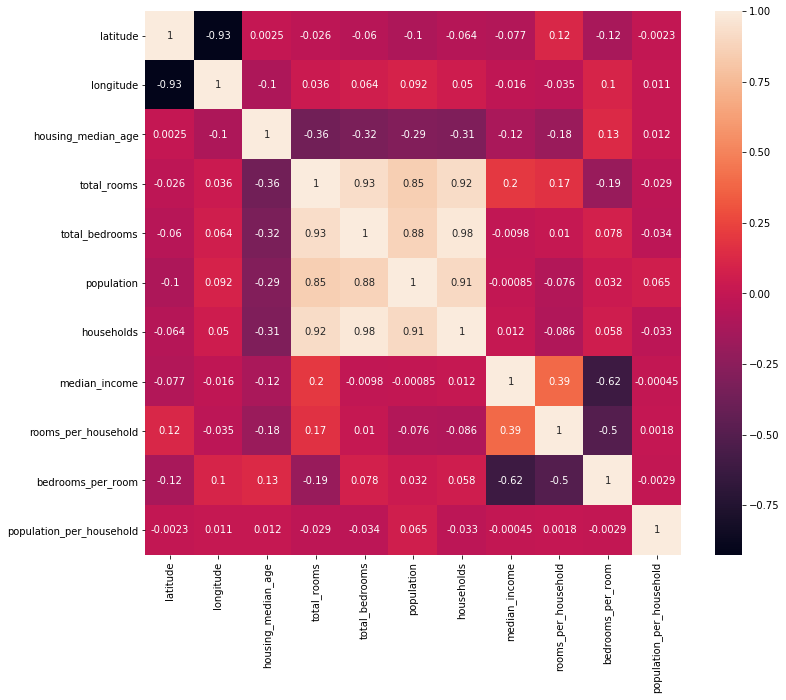

In [13]:
# What are the two features that have the biggest correlation in this dataset?
plt.figure(figsize = (12,10));
sns.heatmap(X_train.corr(), annot=True, fmt='.2g');

### households - totalbedrooms

In [14]:
# We need to turn the median_house_value variable from numeric into binary.
# Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.
average = y_train.mean()

y_train_bin = np.where(y_train > average, 1, 0)
y_valid_bin = np.where(y_valid > average, 1, 0)
y_test_bin = np.where(y_test > average, 1, 0)

In [15]:
# calculate MI
print('MI -' , round(mutual_info_score(X_train['ocean_proximity'], y_train_bin), 2))

MI - 0.1


In [16]:
# create dict for data
train_dict = X_train[['ocean_proximity']].to_dict(orient='records')
valid_dict = X_valid[['ocean_proximity']].to_dict(orient='records')
test_dict = X_test[['ocean_proximity']].to_dict(orient='records')

In [17]:
train_dict[0]

{'ocean_proximity': '<1H OCEAN'}

In [18]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_cat_train = dv.transform(train_dict)
X_cat_valid = dv.transform(valid_dict)
X_cat_test = dv.transform(test_dict)

In [19]:
dv.get_feature_names()

['ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN']

In [20]:
# create df which then concatenate
df_cat_train = pd.DataFrame(data = X_cat_train, columns = dv.get_feature_names(), index = X_train.index)
df_cat_valid = pd.DataFrame(data = X_cat_valid, columns = dv.get_feature_names(), index = X_valid.index)
df_cat_test = pd.DataFrame(data = X_cat_test, columns = dv.get_feature_names(), index = X_test.index)

In [21]:
# concat with main dataset
X_train_ = pd.concat([X_train, df_cat_train], axis = 1)
X_valid_ = pd.concat([X_valid, df_cat_valid], axis = 1)
X_test_ = pd.concat([X_test, df_cat_test], axis = 1)

In [22]:
# delete cat_feature and last ohe (if we want except correlation)
X_train_.drop(columns = ['ocean_proximity', 'ocean_proximity=NEAR OCEAN'], axis = 1, inplace = True)
X_valid_.drop(columns = ['ocean_proximity', 'ocean_proximity=NEAR OCEAN'], axis = 1, inplace = True)
X_test_.drop(columns = ['ocean_proximity', 'ocean_proximity=NEAR OCEAN'], axis = 1, inplace = True)


In [23]:
# we use different range of data and it is bad...
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_, y_train_bin)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [24]:
y_pred = model.predict_proba(X_valid_)[:, 1]
high_price = y_pred > 0.5
result_all = (y_valid_bin == high_price).mean()
print(round(result_all,2))

0.84


In [25]:
# for evaluate
y_pred_train = model.predict_proba(X_train_)[:, 1]
high_price_train = y_pred_train > 0.5
result_all_train = (y_train_bin == high_price_train).mean()
result_all_train

0.8318798449612403

In [26]:
lst_columns = []

for col in X_train_.columns:
    model_1 = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    X_train_1 = X_train_.drop(columns = [col], axis = 1)
    model_1.fit(X_train_1, y_train_bin)
    
    y_pred_train_without_f = model_1.predict_proba(X_train_1)[:, 1]
    high_price_train_without_f = y_pred_train_without_f > 0.5
    result_all_train_without_f = (y_train_bin == high_price_train_without_f).mean()
    
    lst_columns.append((col , result_all_train - result_all_train_without_f))

In [27]:
sorted(lst_columns, key = lambda x : x[1])

[('total_bedrooms', -0.0002422480620154488),
 ('rooms_per_household', 8.07493540051496e-05),
 ('total_rooms', 0.0011304909560724274),
 ('ocean_proximity=ISLAND', 0.0011304909560724274),
 ('bedrooms_per_room', 0.0019379844961240345),
 ('population_per_household', 0.002422480620155043),
 ('latitude', 0.003068475452196462),
 ('households', 0.0033914728682170603),
 ('ocean_proximity=<1H OCEAN', 0.0033914728682170603),
 ('ocean_proximity=NEAR BAY', 0.004037467700258479),
 ('longitude', 0.006217700258397962),
 ('housing_median_age', 0.007267441860465129),
 ('population', 0.008155684754521997),
 ('ocean_proximity=INLAND', 0.013808139534883801),
 ('median_income', 0.05208333333333337)]

In [28]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [29]:
# For this question, we'll see how to use a linear regression model from Scikit-Learn
# We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
# Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
# This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
# Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

y_train_log = np.log1p(y_train)
y_valid_log = np.log1p(y_valid)
y_test_log = np.log1p(y_test)


for a in [0, 0.01, 0.1, 1, 10]: 
    model_reg = Ridge(alpha=a, solver="sag", random_state=42)
    model_reg.fit(X_train_, y_train_log)
    pred_reg = model_reg.predict(X_valid_)
    print(a , ' - ' ,round(rmse(y_valid_log, pred_reg), 3))

0  -  0.524
0.01  -  0.524
0.1  -  0.524
1  -  0.524
10  -  0.524
